In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
seed=42
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [2]:
data = pd.read_csv("datass/dataset.csv")
# Rimuovi le righe in base alle condizioni specificate
# data = data[(data['Education_Level'] != 'Unknown') & (data['Income_Category'] != 'Unknown') & (data['Marital_Status'] != 'Unknown')]
data = data[(data['Income_Category'] != 'Unknown')]

data['Attrition_Flag'] = data.Attrition_Flag.map({'Attrited Customer': 1,
                                               'Existing Customer': 0})
data['Attrition_Flag'].value_counts(normalize=True)

Attrition_Flag
0    0.840266
1    0.159734
Name: proportion, dtype: float64

In [3]:
variables_to_keep = [
    'Dependent_count',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'Total_Trans_Ct',
    'Avg_Utilization_Ratio',
    'Gender',
    'Income_Category'
]
data_subset = data.loc[:, variables_to_keep]

In [4]:
x = data_subset
y = pd.DataFrame(data['Attrition_Flag'])

categorical_columns = ['Gender', 'Income_Category']

x_encoded = pd.get_dummies(x, columns=categorical_columns)

In [5]:
x_train, x_val, y_train, y_val = train_test_split(x_encoded, y, test_size=0.2, random_state=seed, shuffle=True)

In [6]:
clf = LogisticRegression()
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
clf.fit(x_train_scaled, y_train)

x_val_scaled = scaler.transform(x_val)
y_hat = clf.predict(x_val_scaled)

accuracy = accuracy_score(y_val, y_hat)
confusion = confusion_matrix(y_val, y_hat)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)

Accuracy: 0.89
Confusion Matrix:
[[1459   58]
 [ 148  138]]


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
res = []

for C in np.logspace(start=-3, stop=3, num=10, base=10, endpoint=True):
    clf = LogisticRegression(C=C)
    scaler = StandardScaler()

    x_train_scaled = scaler.fit_transform(x_train)
    clf.fit(x_train_scaled, y_train)

    x_val_scaled = scaler.transform(x_val)
    y_hat = clf.predict(x_val_scaled)

    accuracy = accuracy_score(y_val, y_hat)
    precision = precision_score(y_val, y_hat)
    recall = recall_score(y_val, y_hat)
    f1 = f1_score(y_val, y_hat)

    print(f'{C=}, {accuracy=}, {precision=}, {recall=}, {f1=}')
    res.append({
        'C': C,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    })

C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C=0.001, accuracy=0.8480310593455352, precision=1.0, recall=0.04195804195804196, f1=0.08053691275167786
C=0.004641588833612777, accuracy=0.8813089295618414, precision=0.8272727272727273, recall=0.3181818181818182, f1=0.45959595959595956
C=0.021544346900318832, accuracy=0.8863006100942873, precision=0.7288135593220338, recall=0.45104895104895104, f1=0.5572354211663066


C=0.1, accuracy=0.8874098724348308, precision=0.7172774869109948, recall=0.479020979020979, f1=0.5744234800838575
C=0.46415888336127775, accuracy=0.8857459789240155, precision=0.7040816326530612, recall=0.4825174825174825, f1=0.5726141078838174
C=2.154434690031882, accuracy=0.8857459789240155, precision=0.7040816326530612, recall=0.4825174825174825, f1=0.5726141078838174
C=10.0, accuracy=0.8857459789240155, precision=0.7040816326530612, recall=0.4825174825174825, f1=0.5726141078838174
C=46.41588833612773, accuracy=0.8857459789240155, precision=0.7040816326530612, recall=0.4825174825174825, f1=0.5726141078838174


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chang

C=215.44346900318823, accuracy=0.8857459789240155, precision=0.7040816326530612, recall=0.4825174825174825, f1=0.5726141078838174
C=1000.0, accuracy=0.8857459789240155, precision=0.7040816326530612, recall=0.4825174825174825, f1=0.5726141078838174


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
res_df = pd.DataFrame(res)
sorted_df = res_df.sort_values('Recall', ascending=False)
sorted_df

,C,Accuracy,Precision,Recall,F1-score
4,0.464159,0.885746,0.704082,0.482517,0.572614
5,2.154435,0.885746,0.704082,0.482517,0.572614
6,10.000000,0.885746,0.704082,0.482517,0.572614
7,46.415888,0.885746,0.704082,0.482517,0.572614
8,215.443469,0.885746,0.704082,0.482517,0.572614
9,1000.000000,0.885746,0.704082,0.482517,0.572614
3,0.100000,0.887410,0.717277,0.479021,0.574423
2,0.021544,0.886301,0.728814,0.451049,0.557235
1,0.004642,0.881309,0.827273,0.318182,0.459596
0,0.001000,0.848031,1.000000,0.041958,0.080537


In [9]:
res_df.iloc[res_df.Recall.argmax()]

C            0.464159
Accuracy     0.885746
Precision    0.704082
Recall       0.482517
F1-score     0.572614
Name: 4, dtype: float64

In [10]:
C = 0.464159

In [11]:
print(f'Logistic Regression, {C=}')
clf = LogisticRegression(C=C)
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
clf.fit(x_train_scaled, y_train)

x_val_scaled = scaler.transform(x_val)
y_hat_val = clf.predict(x_val_scaled)
accuracy_val = accuracy_score(y_val, y_hat_val)
precision_val = precision_score(y_val, y_hat_val)
recall = recall_score(y_val, y_hat_val)
print(f'VAL: {accuracy_val=}, {recall=}')


Logistic Regression, C=0.464159
VAL: accuracy_val=0.8857459789240155, recall=0.4825174825174825


C:\Users\Leonardo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
confusion_val = confusion_matrix(y_val, y_hat_val)
print(confusion_val)

[[1459   58]
 [ 148  138]]


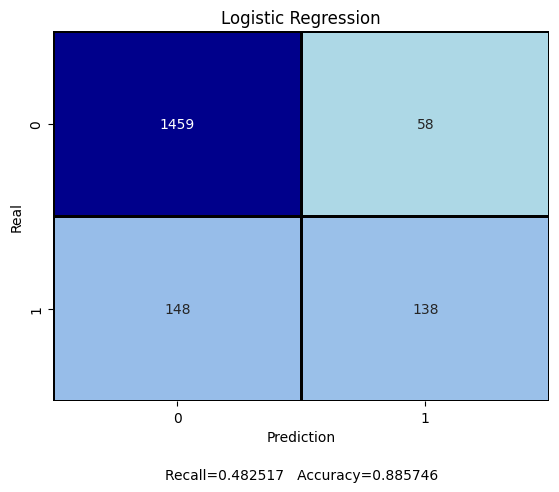

In [13]:
import matplotlib.colors as colors

# Definisci la tua colormap personalizzata con tonalità di blu
custom_cmap = colors.LinearSegmentedColormap.from_list(
    'custom_blues', ['#ADD8E6', '#0000FF','#00008B'])

# Calcola la matrice di confusione
cm = confusion_matrix(y_val, y_hat_val)

# Crea la heatmap utilizzando la colormap personalizzata
sns.heatmap(cm, annot=True, fmt='.0f', cmap=custom_cmap, cbar=False, linecolor='Black', linewidths='1')

plt.ylabel('Real')
plt.xlabel('Prediction')
plt.title('Logistic Regression')
plt.text(0.5, -0.2, 'Recall=0.482517   Accuracy=0.885746', ha='center', va='center', transform=plt.gca().transAxes)

plt.show()

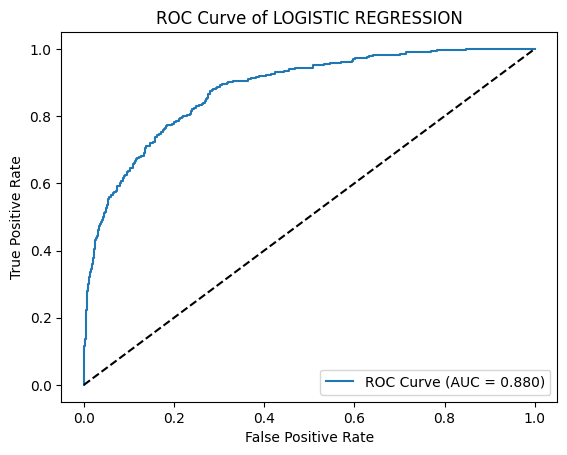

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
y_score = clf.predict_proba(x_val_scaled)
y_score = pd.DataFrame(y_score[:,1])
# Calcolo della curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_score)

# Calcolo dell'area sotto la curva ROC (AUC)
auc = roc_auc_score(y_val, y_score)

# Plot della curva ROC
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of LOGISTIC REGRESSION')
plt.legend(loc='lower right')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


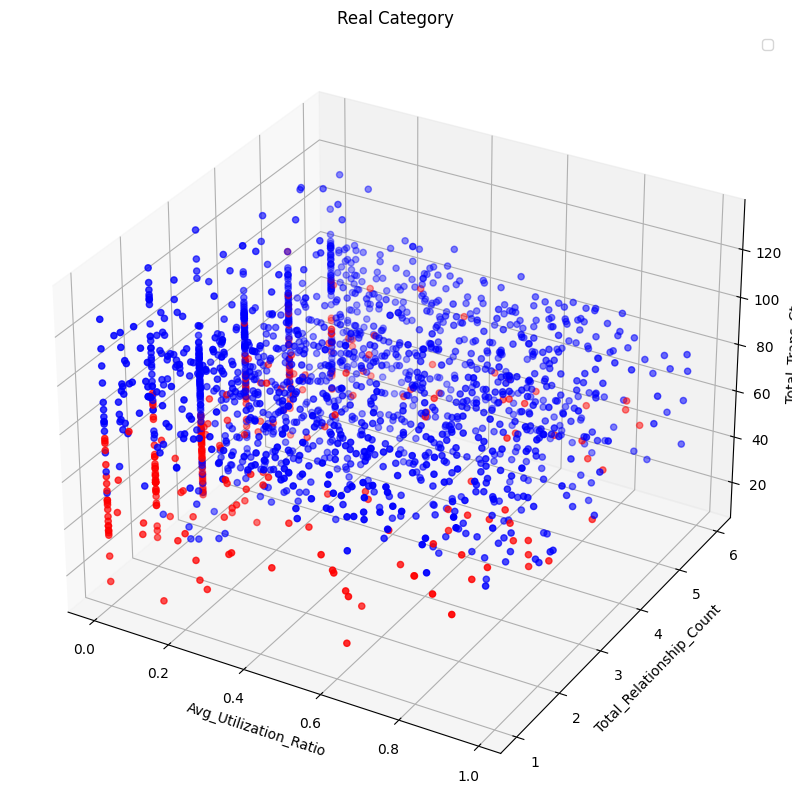

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supponiamo che x_train sia una matrice con 3 features (x1, x2, x3)
# y_train sia l'array delle etichette di classe reali
# y_pred sia l'array delle etichette di classe predette

# Creazione del grafico tridimensionale
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d')

# Estrazione delle features
x1 = x_val['Avg_Utilization_Ratio']
x2 = x_val['Total_Relationship_Count']
x3 = x_val['Total_Trans_Ct']


# Tracciamento dei punti dei dati
custom_cmap = colors.LinearSegmentedColormap.from_list(
    'custom_blues', ['blue', 'red'])

ax.scatter(x1, x2, x3, c=y_val, cmap=custom_cmap)

# Etichettatura degli assi
ax.set_xlabel('Avg_Utilization_Ratio')
ax.set_ylabel('Total_Relationship_Count')
ax.set_zlabel('Total_Trans_Ct')
ax.set_title('Real Category')
ax.legend()
# Visualizzazione del grafico
plt.show()

C:\Users\Leonardo\AppData\Local\Temp\ipykernel_18268\1486662478.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x1[np.where(True_Positive)[1]], x2[np.where(True_Positive)[1]], x3[np.where(True_Positive)[1]], c='red', cmap='cool', label='True Positive')
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_18268\1486662478.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x1[np.where(True_Negative)[1]], x2[np.where(True_Negative)[1]], x3[np.where(True_Negative)[1]], c='blue', cmap='cool', label='True Negative')
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_18268\1486662478.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x1[np.where(False_Positive)[1]], x2[np.where(False_Positive)[1]], x3[np.where(False_Positive)[1]], c='aqua', cmap='cool', label='False Positive')
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_18

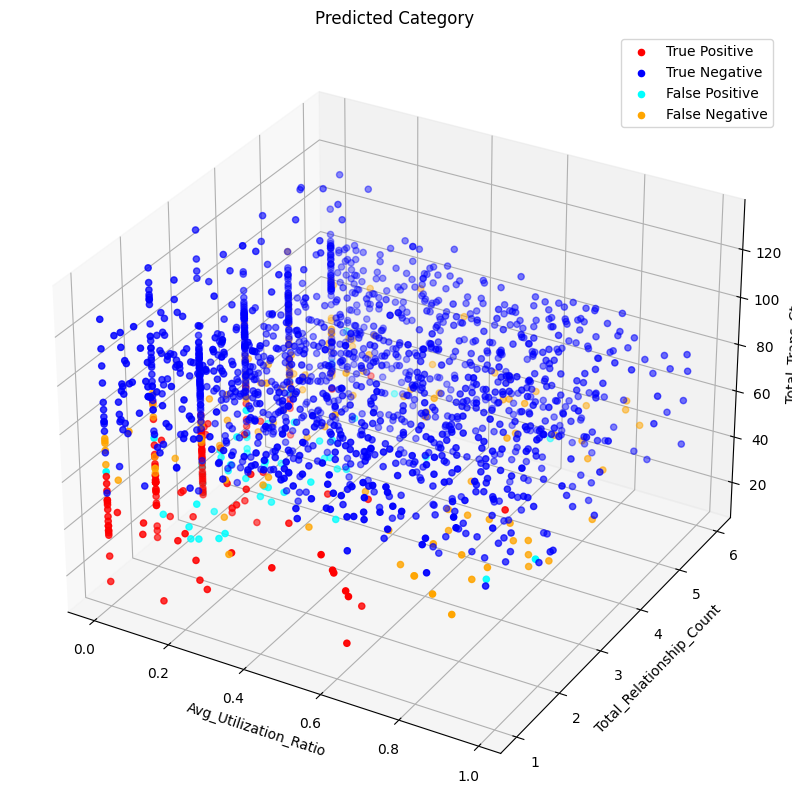

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supponiamo che x_train sia una matrice con 3 features (x1, x2, x3)
# y_train sia l'array delle etichette di classe reali
# y_pred sia l'array delle etichette di classe predette

# Creazione del grafico tridimensionale
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d')
x1 = np.array(x_val['Avg_Utilization_Ratio'])
x2 = np.array(x_val['Total_Relationship_Count'])
x3 = np.array(x_val['Total_Trans_Ct'])
y_val_equals_1 = (np.array(y_val).transpose() == 1)
y_hat_equals_1 = (y_hat_val == 1)
y_val_equals_0 = (np.array(y_val).transpose() == 0)
y_hat_equals_0 = (y_hat_val == 0)
True_Positive = np.logical_and(y_val_equals_1, y_hat_equals_1)
True_Negative = np.logical_and(y_val_equals_0, y_hat_equals_0)
False_Positive = np.logical_and(y_val_equals_0, y_hat_equals_1)
False_Negative = np.logical_and(y_val_equals_1, y_hat_equals_0)

# Tracciamento dei punti dei dati con etichette reali
ax.scatter(x1[np.where(True_Positive)[1]], x2[np.where(True_Positive)[1]], x3[np.where(True_Positive)[1]], c='red', cmap='cool', label='True Positive')
ax.scatter(x1[np.where(True_Negative)[1]], x2[np.where(True_Negative)[1]], x3[np.where(True_Negative)[1]], c='blue', cmap='cool', label='True Negative')
ax.scatter(x1[np.where(False_Positive)[1]], x2[np.where(False_Positive)[1]], x3[np.where(False_Positive)[1]], c='aqua', cmap='cool', label='False Positive')
ax.scatter(x1[np.where(False_Negative)[1]], x2[np.where(False_Negative)[1]], x3[np.where(False_Negative)[1]], c='orange', cmap='cool', label='False Negative')

# Etichettatura degli assi
ax.set_xlabel('Avg_Utilization_Ratio')
ax.set_ylabel('Total_Relationship_Count')
ax.set_zlabel('Total_Trans_Ct')
ax.legend()
ax.set_title('Predicted Category')
# Visualizzazione del grafico
plt.show()